In [1]:
%tensorflow_version 1.x
import tensorflow as tf

TensorFlow 1.x selected.


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [20]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [21]:
housing.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [22]:
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [23]:
housing.target.reshape(-1,1)

array([[4.526],
       [3.585],
       [3.521],
       ...,
       [0.923],
       [0.847],
       [0.894]])

In [25]:
housing.data.shape

(20640, 8)

In [0]:
m,n = housing.data.shape

In [28]:
housing_data_bias = np.column_stack([np.ones(m), housing.data])
housing_data_bias

array([[   1.        ,    8.3252    ,   41.        , ...,    2.55555556,
          37.88      , -122.23      ],
       [   1.        ,    8.3014    ,   21.        , ...,    2.10984183,
          37.86      , -122.22      ],
       [   1.        ,    7.2574    ,   52.        , ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.        ,    1.7       ,   17.        , ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.        ,    1.8672    ,   18.        , ...,    2.12320917,
          39.43      , -121.32      ],
       [   1.        ,    2.3886    ,   16.        , ...,    2.61698113,
          39.37      , -121.24      ]])

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()

In [0]:
scaled = scaler.fit_transform(housing_data_bias)

In [37]:
tf.reset_default_graph()

mse_loss = []
epochs_list = []

num_of_epochs = 100
lr = 0.1

X = tf.constant(scaled, dtype = tf.float32)
y = tf.constant(target, dtype = tf.float32)

weights = tf.Variable(tf.random_uniform([n+1, 1], -1.0, 1.0))

y_pred = tf.matmul(X, weights)
error = y_pred - y
mse = tf.reduce_mean(tf.square(error))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = lr)
training_op = optimizer.minimize(mse)
init = tf.global_variables_initializer()

with tf.Session() as sess:
  sess.run(init)
  for epoch in range(num_of_epochs):
    if epoch % 10 == 0:
      print("Epoch:",epoch, "MSE:",mse.eval())
      mse_loss.append(mse.eval())
      epochs_list.append(epoch)
    sess.run(training_op)
  final_weights = weights.eval()

Epoch: 0 MSE: 6.1992025
Epoch: 10 MSE: 4.934189
Epoch: 20 MSE: 4.889474
Epoch: 30 MSE: 4.866815
Epoch: 40 MSE: 4.850443
Epoch: 50 MSE: 4.8384266
Epoch: 60 MSE: 4.829578
Epoch: 70 MSE: 4.82304
Epoch: 80 MSE: 4.8181944
Epoch: 90 MSE: 4.81459


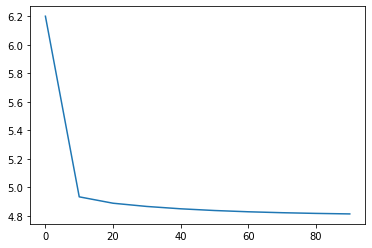

In [38]:
plt.plot(epochs_list, mse_loss)